# 차량 EV 경진대회

## Data Import

In [1]:
import pandas as pd
import os 

train = pd.read_csv('https://raw.githubusercontent.com/han942/vscode/refs/heads/main/datafile/dacon/CarEV/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/han942/vscode/refs/heads/main/datafile/dacon/CarEV/test.csv')
submit = pd.read_csv('https://raw.githubusercontent.com/han942/vscode/refs/heads/main/datafile/dacon/CarEV/sample_submission.csv')

In [2]:
train.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


In [3]:
test.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,P사,TayCT,Nearly New,76.093,AWD,14057,2,No,0
1,TEST_001,B사,iX,Brand New,90.000,AWD,7547,8,No,0
2,TEST_002,B사,i5,Brand New,NaN,RWD,7197,7,Yes,0
3,TEST_003,H사,ION5,Nearly New,68.479,AWD,10357,7,No,1
4,TEST_004,K사,EV6,Brand New,NaN,FWD,7597,10,No,0


In [4]:
submit.head()

,ID,가격(백만원)
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0


In [5]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes,columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df) *100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    
    return summ
summary(train)

data shape: (7497, 11)


,data type,#missing,%missing,#unique,min,max
ID,object,0,0.000000,7497,NaN,NaN
제조사,object,0,0.000000,7,NaN,NaN
모델,object,0,0.000000,21,NaN,NaN
차량상태,object,0,0.000000,3,NaN,NaN
배터리용량,float64,2711,36.161131,194,46.0,99.8
구동방식,object,0,0.000000,3,NaN,NaN
주행거리(km),int64,0,0.000000,6916,3.0,199827.0
보증기간(년),int64,0,0.000000,11,0.0,10.0
사고이력,object,0,0.000000,2,NaN,NaN
연식(년),int64,0,0.000000,3,0.0,2.0


In [6]:
cat_col = ['제조사','모델','차량상태','구동방식','사고이력']
con_col = ['배터리용량','주행거리(km)','보증기간(년)','연식(년)','가격(백만원)']

"한글을 인식하지 못할 상황을 대비한 전처리"


In [7]:
test['제조사'] = test['제조사'].apply(lambda x: x.replace('사',''))
train['제조사'] = train['제조사'].apply(lambda x: x.replace('사',''))
train.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


## EDA

In [8]:
df_c = train.copy()
df_c.drop('ID',axis=1,inplace=True)
df_c.head()

,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,P,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,K,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,A,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,A,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,B,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


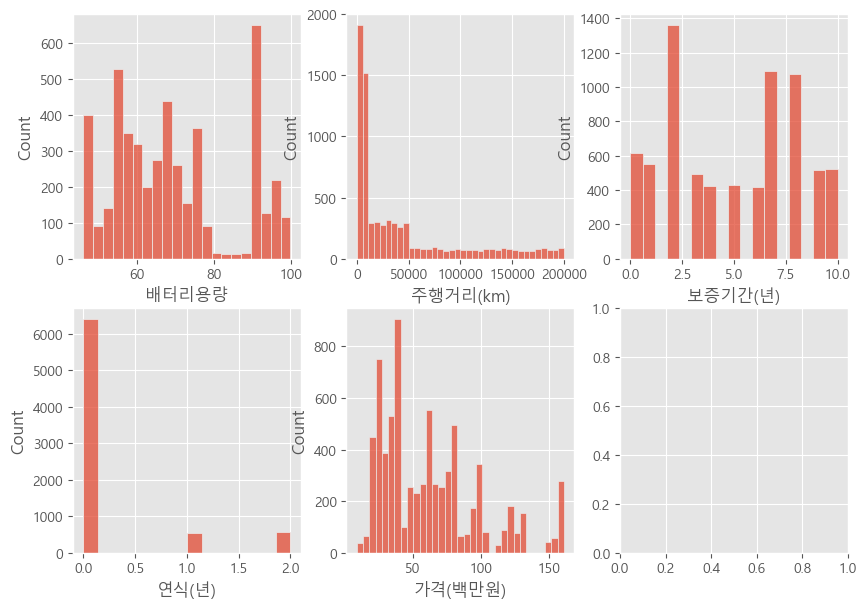

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('ggplot')

# 각 Feature의 분포도 plot
fig,ax = plt.subplots(2,3,figsize=(10,7))
ax = ax.flatten()

for i,col in enumerate(con_col):
    sns.histplot(df_c[col],ax=ax[i])

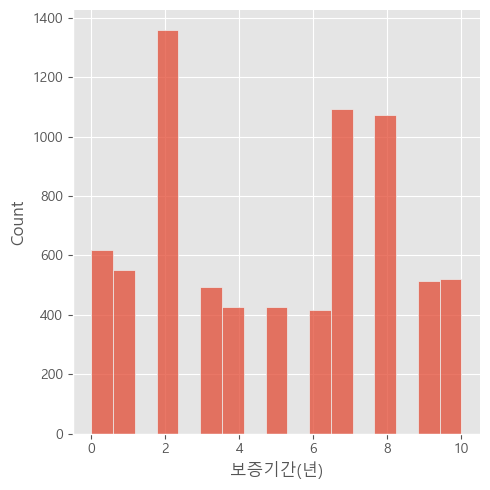

In [10]:
sns.displot(df_c['보증기간(년)'])

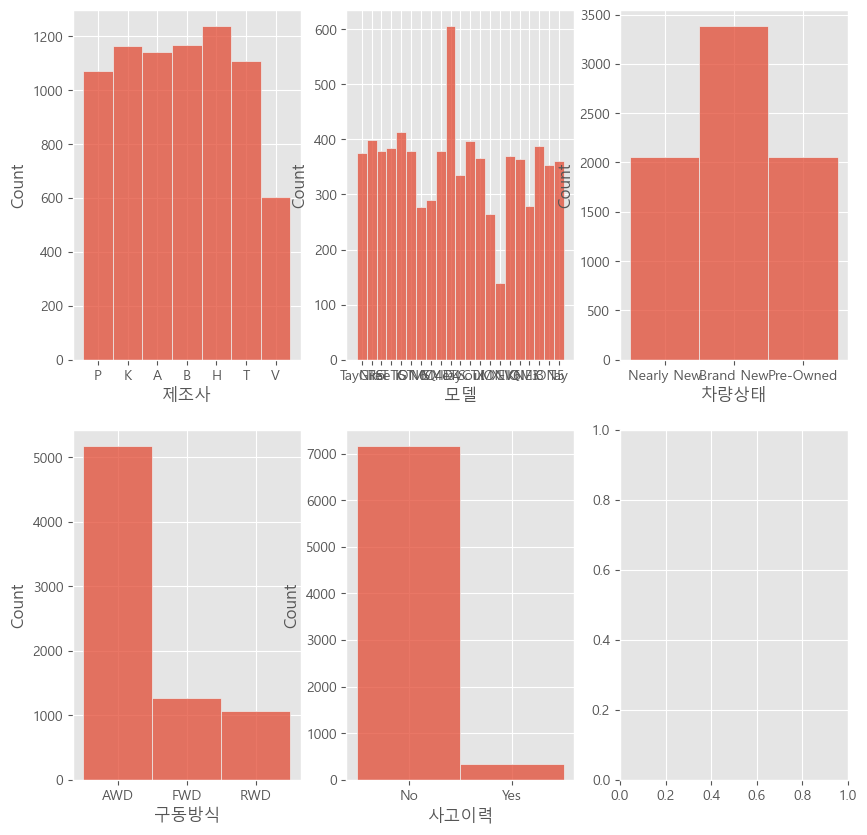

In [11]:
#범주형 변수의 분포
fig,ax = plt.subplots(2,3,figsize=(10,10))
ax = ax.flatten()
for i,col in enumerate(cat_col):
    sns.histplot(x=df_c[col],ax=ax[i])

### 0. 종속변수(가격)
- skewness:1
결측치 X

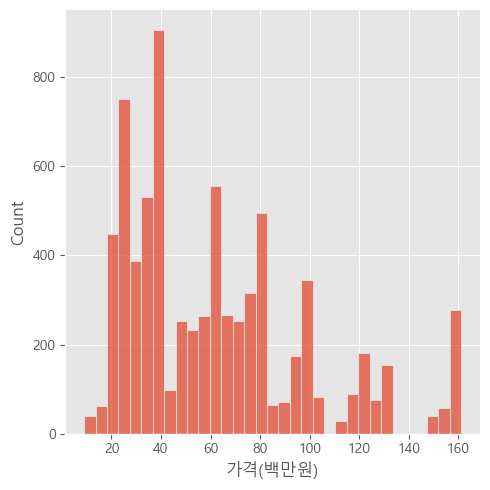

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('ggplot')

sns.displot(train['가격(백만원)'])

### 1. 제조사
- 각 제조사별 (7개)의 도수가 비슷함
- P 제조사가 가장 차량의 가격이 높다.

<Axes: xlabel='제조사', ylabel='가격(백만원)'>

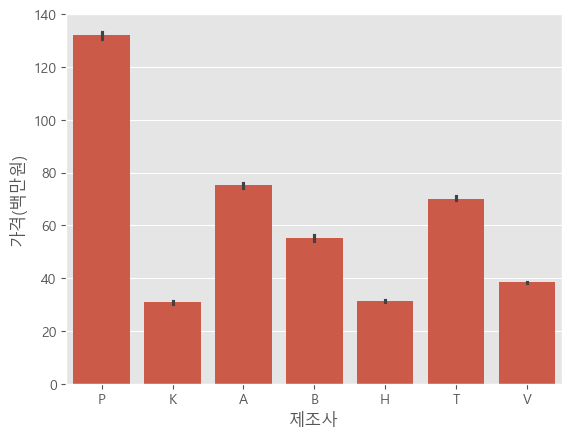

In [13]:
sns.barplot(y=train['가격(백만원)'],x=train['제조사'])

### 2. 모델
- 대체로 분포 균일
- 'TayGTS'모델의 값이 가장 높으며, IonicQ의 모델 가격이 가장 낮음



In [14]:
train['모델'].unique()

array(['TayGTS', 'Niro', 'eT', 'RSeTGT', 'i5', 'ION6', 'MS', 'MY', 'Q4eT',
       'ID4', 'TayCT', 'Soul', 'iX', 'MX', 'IONIQ', 'EV6', 'KNE', 'M3',
       'i3', 'ION5', 'Tay'], dtype=object)

<Axes: ylabel='가격(백만원)'>

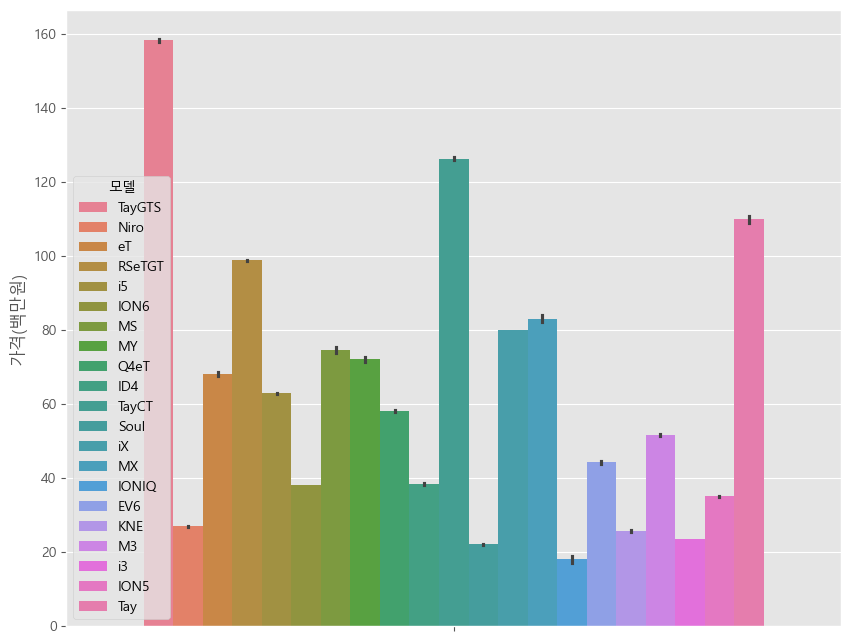

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(y=train['가격(백만원)'],hue=train['모델'])

### 3. 차량상태
- 분포도 비슷하고, 차량상태에따른 가격 변동차이도 거의 없음.
- **'nearly-new'와 'pre-owned'의 차이점에 대한 궁금증** 
    - nearly-new 보다는 pre-owned가 더 많은 주행거리를 가지고 있음.
- 차량상태가 Brand New이어도 주행거리가 O이아니라 (거의 신형으로 생각)

<Axes: ylabel='가격(백만원)'>

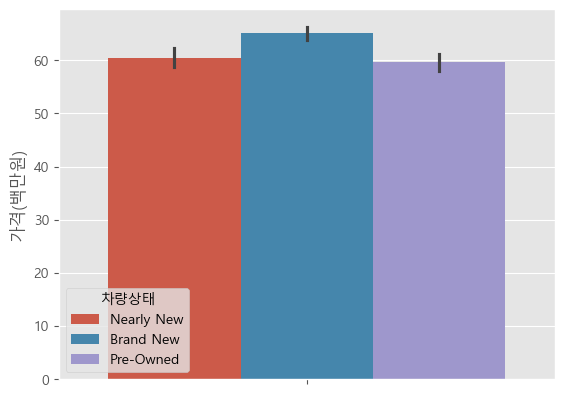

In [16]:
sns.barplot(y=train['가격(백만원)'],hue=train['차량상태'])

<Axes: xlabel='주행거리(km)', ylabel='Count'>

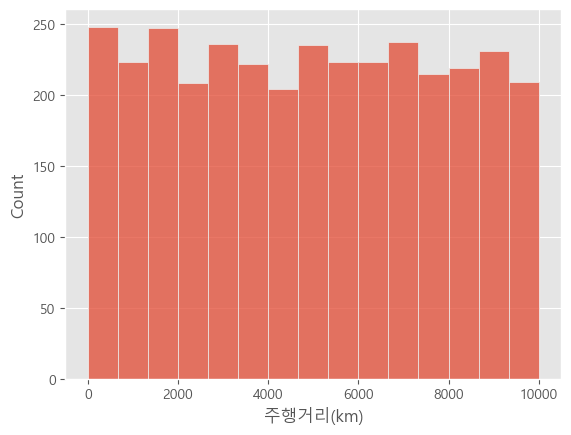

In [17]:
sns.histplot(train.loc[train['차량상태']=='Brand New']['주행거리(km)'])

Pre-Owned 최소 거리: 11477
nearly-new 최소 거리: 10004


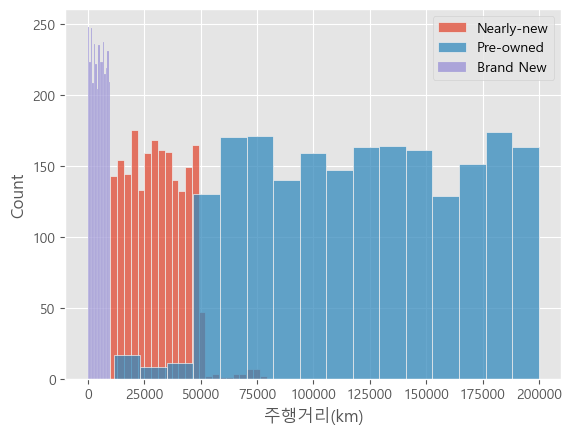

In [18]:
sns.histplot(train.loc[train['차량상태']=='Nearly New']['주행거리(km)'],label='Nearly-new')
sns.histplot(train.loc[train['차량상태']=='Pre-Owned']['주행거리(km)'],label='Pre-owned')
sns.histplot(train.loc[train['차량상태']=='Brand New']['주행거리(km)'],label='Brand New')

plt.legend()

print('Pre-Owned 최소 거리:',train.loc[train['차량상태']=='Pre-Owned']['주행거리(km)'].min())
print('nearly-new 최소 거리:',train.loc[train['차량상태']=='Nearly New']['주행거리(km)'].min())

### 4. 배터리용량 
- 용량이 69.397187인 도수가 가장 많은 부분을 차지.
- 대체로 배터리용량이 증가할 수록 가격도 상승하는 상관관계
- 주행거리와 큰 상관관계 / 배터리 용량이 클수록, 주행거리가 작음.

In [19]:
df_missing_train = train.loc[~train['배터리용량'].isna()]
df_missing_test = test.loc[test['배터리용량'].isna()]

<Axes: xlabel='배터리용량', ylabel='주행거리(km)'>

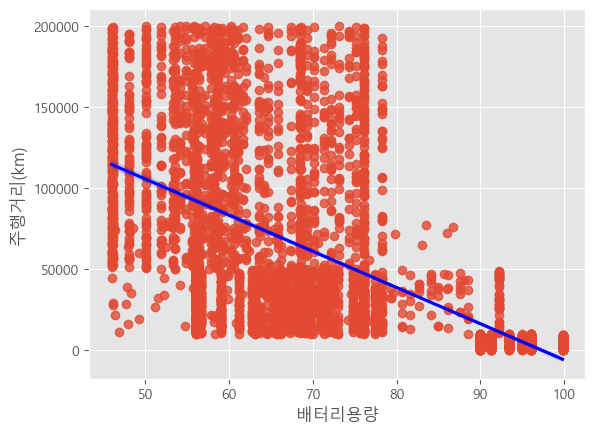

In [20]:
sns.regplot(x=df_missing_train['배터리용량'],y=df_missing_train['주행거리(km)'],line_kws={'color':'blue'})

<Axes: xlabel='가격(백만원)', ylabel='Count'>

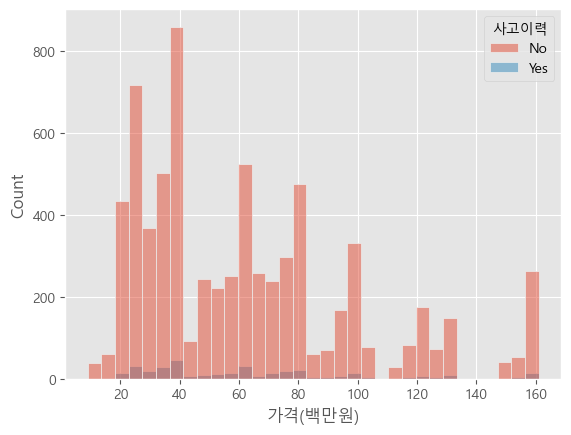

In [21]:
sns.histplot(x=train['가격(백만원)'],hue=train['사고이력'])

In [22]:
df_missing_train

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
4,TRAIN_0004,B,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02
5,TRAIN_0005,H,ION6,Pre-Owned,58.162,AWD,103100,3,No,0,37.02
...,...,...,...,...,...,...,...,...,...,...,...
7486,TRAIN_7486,A,eT,Brand New,91.200,AWD,602,7,No,0,65.57
7487,TRAIN_7487,H,IONIQ,Nearly New,67.170,FWD,29028,3,No,1,11.39
7493,TRAIN_7493,B,i3,Pre-Owned,46.000,RWD,135411,2,No,0,23.40
7495,TRAIN_7495,B,i3,Nearly New,56.000,RWD,39445,6,No,2,24.00


<Axes: xlabel='배터리용량', ylabel='가격(백만원)'>

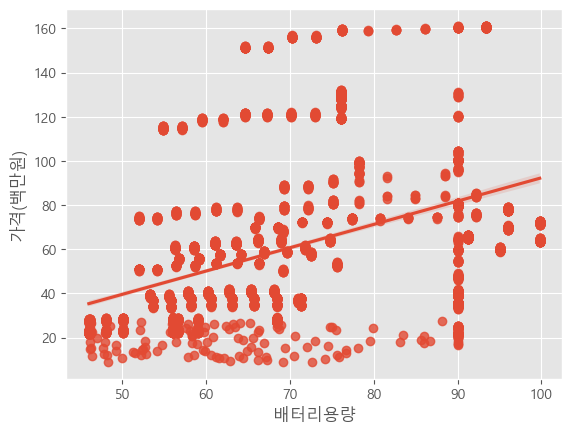

In [23]:
sns.regplot(y=train['가격(백만원)'],x=train['배터리용량'])

### 5. 구동방식
- 분포에는 크게 차이는 없다. AWD의 가격이 많이 높다

<Axes: ylabel='가격(백만원)'>

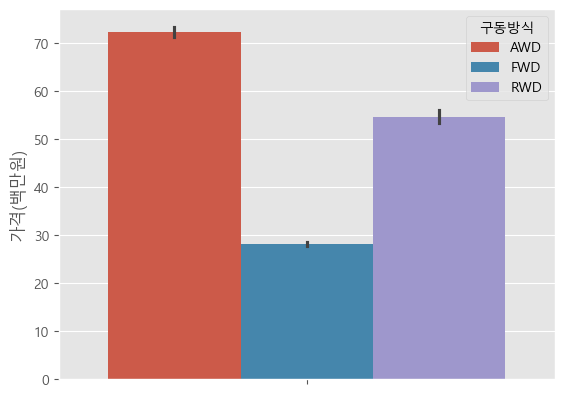

In [24]:
sns.barplot(y=train['가격(백만원)'],hue=train['구동방식'])

### 6. 주행거리(km)
- 주행거리 10000km이하가 전체의 절반 이상을 차지함.

<Axes: xlabel='주행거리(km)', ylabel='가격(백만원)'>

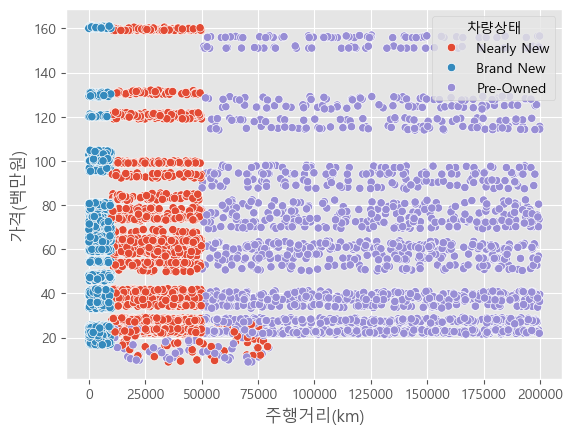

In [25]:
sns.scatterplot(data=train,x='주행거리(km)',y='가격(백만원)',hue='차량상태')

In [26]:
train.loc[(train['차량상태']=='Nearly New')&(train['주행거리(km)']>50000)]
train.loc[(train['차량상태']=='Pre-Owned')&(train['주행거리(km)']<50000)]

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
180,TRAIN_0180,H,IONIQ,Pre-Owned,75.64,FWD,22186,1,No,0,12.20
254,TRAIN_0254,H,IONIQ,Pre-Owned,NaN,FWD,22289,1,No,0,9.77
268,TRAIN_0268,H,IONIQ,Pre-Owned,79.60,FWD,35181,1,No,0,18.46
346,TRAIN_0346,H,IONIQ,Pre-Owned,75.50,FWD,44283,1,No,0,23.45
710,TRAIN_0710,H,IONIQ,Pre-Owned,52.30,FWD,44383,1,No,2,14.34
1068,TRAIN_1068,H,IONIQ,Pre-Owned,68.92,FWD,48664,1,No,1,25.71
1180,TRAIN_1180,H,IONIQ,Pre-Owned,68.47,FWD,23088,1,No,2,24.82
1537,TRAIN_1537,H,IONIQ,Pre-Owned,NaN,FWD,15734,1,No,2,14.97
1663,TRAIN_1663,H,IONIQ,Pre-Owned,59.85,FWD,31575,1,No,1,13.94
1831,TRAIN_1831,H,IONIQ,Pre-Owned,NaN,FWD,49931,1,No,2,24.62


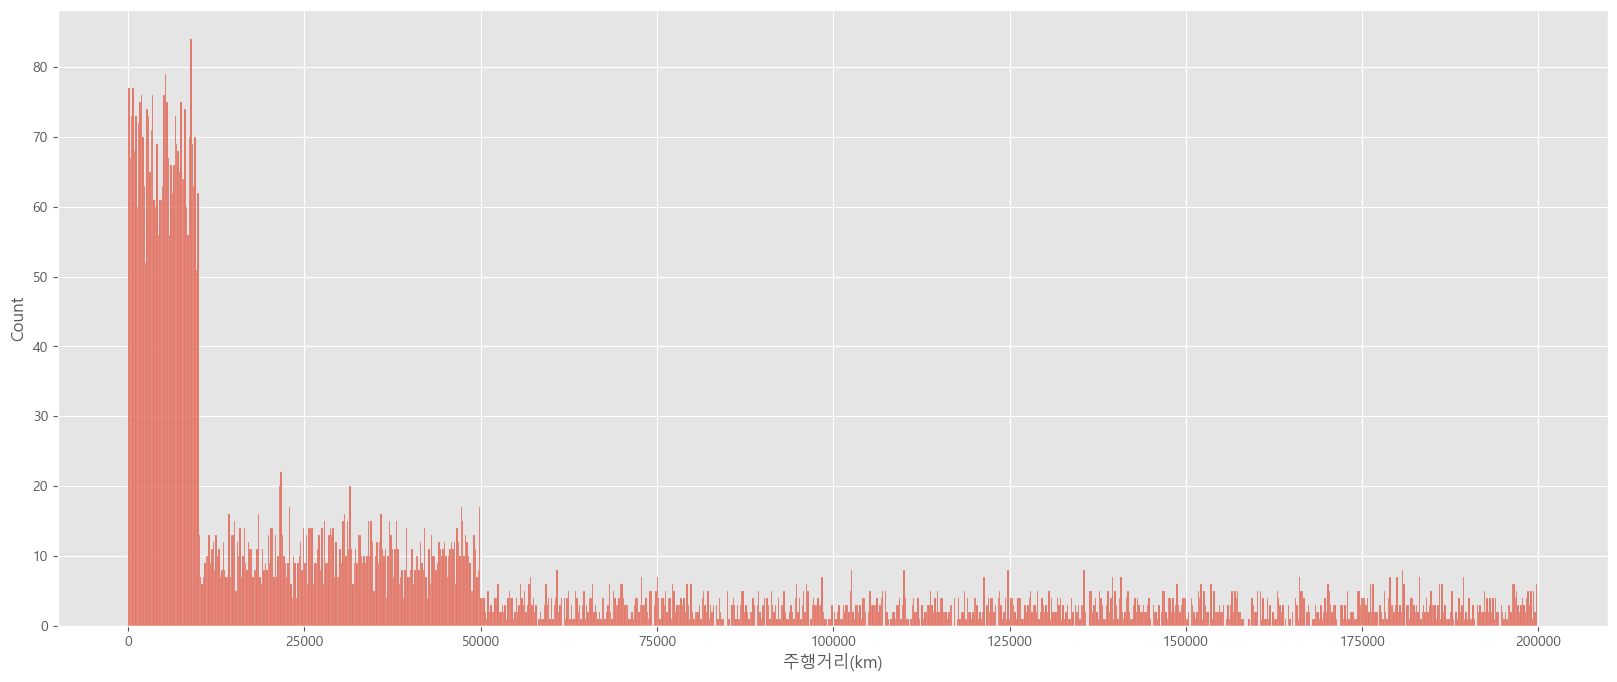

In [27]:
plt.figure(figsize=(20,8))
sns.histplot(train['주행거리(km)'],bins=1000)
plt.xscale('linear')

(7497, 11)

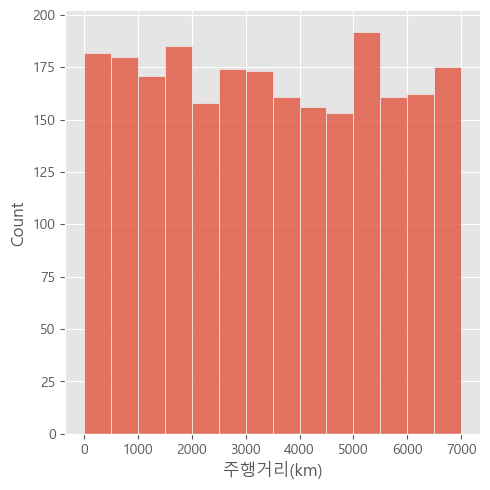

In [28]:
sns.displot(train.loc[train['주행거리(km)']<7000,'주행거리(km)'])
train.shape

### 7. 보증기간(년)

<Axes: xlabel='보증기간(년)', ylabel='가격(백만원)'>

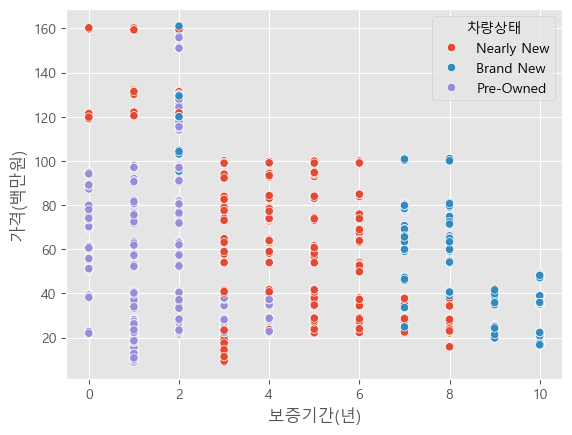

In [29]:
sns.scatterplot(data=train,x='보증기간(년)',y='가격(백만원)',hue='차량상태')

## Feature Engineering
- 종속변수에 가장 상관관계 -> 배터리용량 / 보증기간

In [30]:
df_c = train.copy()
train_ID = df_c['ID']

df1_c = test.copy()
test_ID = df1_c['ID']

df_c.drop('ID',axis=1,inplace=True)
df1_c.drop('ID',axis=1,inplace=True)

df_c.corr(numeric_only=True)

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.576538,0.558242,-0.021845,0.431668
주행거리(km),-0.576538,1.000000,-0.664071,-0.089586,-0.035488
보증기간(년),0.558242,-0.664071,1.000000,0.035294,-0.349962
연식(년),-0.021845,-0.089586,0.035294,1.000000,-0.058455
가격(백만원),0.431668,-0.035488,-0.349962,-0.058455,1.000000


In [31]:
df_c.drop(df_c.loc[(df_c['차량상태'] == 'Nearly New') & (df_c['주행거리(km)'] > 50000)].index, inplace=True)
df_c.drop(df_c.loc[(df_c['차량상태'] == 'Pre-Owned') & (df_c['주행거리(km)'] < 50000)].index, inplace=True)

Label Encoding for Categorical Data

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_c[cat_col] = df_c[cat_col].apply(lambda x: le.fit_transform(x))
df1_c[cat_col] = df1_c[cat_col].apply(lambda x: le.fit_transform(x))

<Axes: xlabel='배터리용량', ylabel='주행거리(km)'>

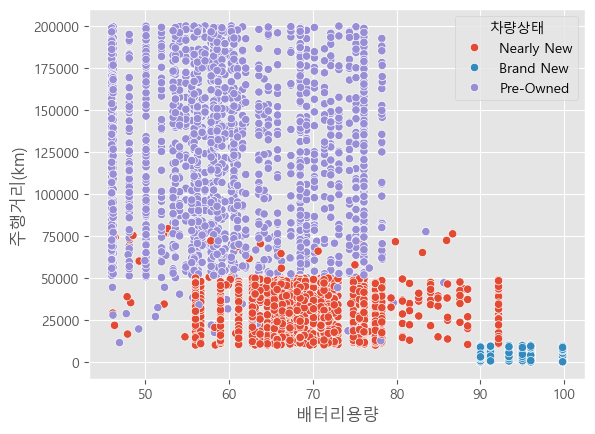

In [33]:
sns.scatterplot(data=train,x='배터리용량',y='주행거리(km)',hue='차량상태')

c:\Users\hanan\miniconda3\envs\jupytercode\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()


<Axes: >

c:\Users\hanan\miniconda3\envs\jupytercode\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\hanan\miniconda3\envs\jupytercode\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


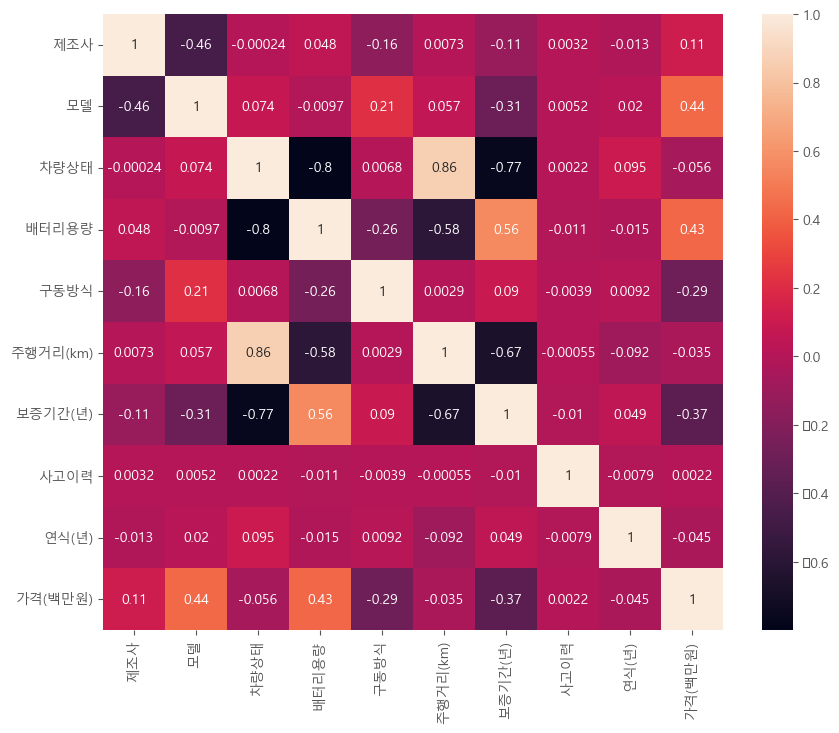

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df_c.corr(),annot=True)

Data 나누기

In [35]:
print(df_c.shape,df1_c.shape)
X,y = df_c.drop(columns=['가격(백만원)']),df_c['가격(백만원)']
X_test = df1_c

(7427, 10) (846, 9)


## 모델 탐색

### RandomForestRegressor
- baseline: 1.49

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
import numpy as np
from sklearn.model_selection import KFold
folds = KFold(n_splits=5,shuffle=True,random_state=2025)

val_scores_rf = []
test_pred_rf = np.zeros(len(test))

for idx,(train_idx,val_idx) in enumerate(folds.split(X,y)):
    print(f'Fold: {idx+1} / Fold: {folds.n_splits}')
    X_train,y_train = X.iloc[train_idx],y.iloc[train_idx]
    X_val,y_val = X.iloc[val_idx],y.iloc[val_idx]

    rf = RandomForestRegressor(random_state=2025)
    rf_model = rf.fit(X_train,y_train)
    
    train_y_pred = rf_model.predict(X_train)
    val_y_pred = rf_model.predict(X_val)

    print(f'Train RMSE: {root_mean_squared_error(y_train,train_y_pred)}')
    print(f'Val RMSE: {root_mean_squared_error(y_val,val_y_pred)}')
    print('-' * 30)

    test_pred_rf += rf_model.predict(X_test) / folds.n_splits
    val_scores_rf.append(root_mean_squared_error(val_y_pred,y_val))

print(f'Average RMSE: {np.array(val_scores_rf).mean()}')

Fold: 1 / Fold: 5
Train RMSE: 0.6061133161618163
Val RMSE: 1.330802156091396
------------------------------
Fold: 2 / Fold: 5
Train RMSE: 0.5596767813904838
Val RMSE: 1.4574628852260456
------------------------------
Fold: 3 / Fold: 5
Train RMSE: 0.5330256974661155
Val RMSE: 1.7091533659720821
------------------------------
Fold: 4 / Fold: 5
Train RMSE: 0.5737337988787158
Val RMSE: 1.4536196055780108
------------------------------
Fold: 5 / Fold: 5
Train RMSE: 0.5855359356165161
Val RMSE: 1.5212654795377314
------------------------------
Average RMSE: 1.4944606984810533


### XGBRegressor
- xgboost 자체 처리: 1.473 (파라미터 설정 X => n_est:100,lr:0.3)

- ~~xgboost 자체 처리: 1.57(파라미터 설정 O)~~
- ~~'run_dis' column 추가: 1.4673~~
- ~~slinear interpolation: 1.473 (파라미터 설정 X)~~
- ~~0으로 결측치 처리: 1.48(파라미터 설정X)~~
- ~~train의 평균값으로 대체 : 1.52~~
- ~~종속변수의 log1p 분포 변환:~~ 
- ~~train column에 scaling 변환~~
- 주행거리에서의 IONIQ 이상치 제거: 1.32 => 지리네
    - tuning 후:
- 주행거리 + 배터리용량 이상치 제거: 1.49

#### Baseline

In [35]:
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
import numpy as np
from sklearn.model_selection import KFold

folds = KFold(n_splits=5,shuffle=True,random_state=2025)

test_prediction = np.zeros(len(X_test))
val_scores = []

for idx,(train_idx,val_idx) in enumerate(folds.split(X,y)):
    print(f'Fold {idx+1} / Fold {folds.n_splits}')
    X_train,y_train = X.iloc[train_idx],y.iloc[train_idx]
    X_val,y_val = X.iloc[val_idx],y.iloc[val_idx]

    xgb_model = XGBRegressor(random_state=2025)

    xgb_model.fit(X_train,y_train)

    train_y_pred = xgb_model.predict(X_train)
    val_y_pred = xgb_model.predict(X_val)

    print(f'Train RMSE: {root_mean_squared_error(y_train,train_y_pred)}')
    print(f'Val RMSE: {root_mean_squared_error(y_val,val_y_pred)}')
    print('-'*30)

    #Average of the Fold's Prediction for test data(X_test) => using as the submission
    test_prediction += xgb_model.predict(X_test) / folds.n_splits   #5-fold
    y_preds = xgb_model.predict(X_val)
    val_scores.append(root_mean_squared_error(y_val,y_preds))

print(f'RMSE: {np.array(val_scores).mean()}')

Fold 1 / Fold 5
Train RMSE: 0.7320148152901624
Val RMSE: 1.3923133638391922
------------------------------
Fold 2 / Fold 5
Train RMSE: 0.7581559446610894
Val RMSE: 1.3279404706896556
------------------------------
Fold 3 / Fold 5
Train RMSE: 0.7652316005758445
Val RMSE: 1.2654826735572058
------------------------------
Fold 4 / Fold 5
Train RMSE: 0.7459440203687012
Val RMSE: 1.2957267360031837
------------------------------
Fold 5 / Fold 5
Train RMSE: 0.75588488310537
Val RMSE: 1.2731942996569143
------------------------------
RMSE: 1.3109315087492304


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

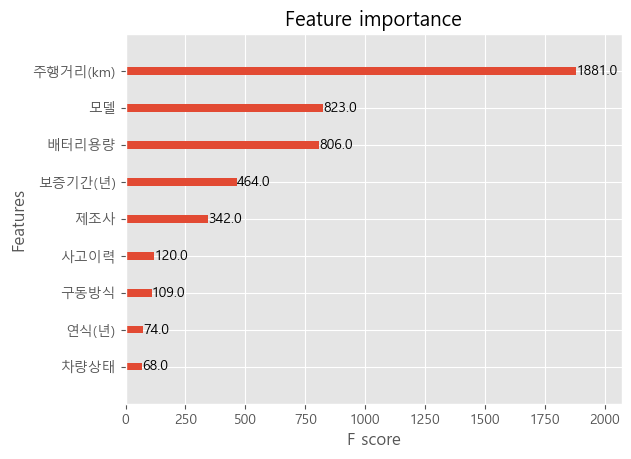

In [36]:
import xgboost
xgboost.plot_importance(xgb_model)

#### Optuna

In [36]:
from sklearn.model_selection import train_test_split
X_train_op, X_val_op, y_train_op, y_val_op = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from optuna import Trial,visualization
from optuna.samplers import TPESampler
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
import xgboost


def objectivexgr(trial:Trial,X,y):
    global param
    param = {'random_state': 42,
             'n_estimators': trial.suggest_int('n_estimators', 100,1500),
             'learning_rate': trial.suggest_float('learning_rate',0.03,0.4)}
    model = XGBRegressor(**param,eval_metric='rmse')
    xgb_model = model.fit(X_train_op, y_train_op,verbose=False,eval_set=[(X_val_op,y_val_op)])
    answer = xgb_model.predict(X_val_op)
    score = root_mean_squared_error(y_val_op,answer)

    return score

In [40]:
#아무것도 없을 때 0.8264
study = optuna.create_study(direction='minimize',sampler=TPESampler(seed=2024))

study.optimize(lambda trial: objectivexgr(trial,df_c.drop(columns=['가격(백만원)']),df_c['가격(백만원)']),n_trials=70)
print('Best trial: score: {}, \nparmas: {}'.format(study.best_trial.value,study.best_trial.params))

[I 2025-02-19 15:00:09,498] A new study created in memory with name: no-name-50860268-bd65-4fec-8f24-8920afc760e3
[I 2025-02-19 15:00:10,594] Trial 0 finished with value: 1.5093822125279854 and parameters: {'n_estimators': 923, 'learning_rate': 0.18347452249346372}. Best is trial 0 with value: 1.5093822125279854.
[I 2025-02-19 15:00:11,040] Trial 1 finished with value: 1.328011174240857 and parameters: {'n_estimators': 363, 'learning_rate': 0.03360494624814214}. Best is trial 1 with value: 1.328011174240857.
[I 2025-02-19 15:00:11,510] Trial 2 finished with value: 1.3321029246661888 and parameters: {'n_estimators': 387, 'learning_rate': 0.03948530442820518}. Best is trial 1 with value: 1.328011174240857.
[I 2025-02-19 15:00:12,772] Trial 3 finished with value: 1.484675534218712 and parameters: {'n_estimators': 1118, 'learning_rate': 0.1743432836119553}. Best is trial 1 with value: 1.328011174240857.
[I 2025-02-19 15:00:13,667] Trial 4 finished with value: 1.4196793793945095 and paramet

Best trial: score: 1.3025612483765179, 
parmas: {'n_estimators': 420, 'learning_rate': 0.04496321978772258}


In [41]:
optuna.visualization.plot_optimization_history(study)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Objective Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
                    66, 67, 68, 69],
              'y': [1.5093822125279854, 1.328011174240857, 1.3321029246661888,
                    1.484675534218712, 1.4196793793945095, 1.3252575939844276,
                    1.551269640044011, 1.4822689023645472, 1.3187406705592164,
                    1.5415261049404727, 1.3684226348649404, 1.4353362224341373,
                    1.3826715866762964, 1.3121762216438129, 1.3435930855996205,
                    1.4045804107557218, 1.3294637444818163, 1.3713021781962496,
                    1.3646689945373807, 1.3281843595303813, 1.4941654080773255,
                    1.3836049840250744, 1.3308661533092088, 1.3262034447612137,
                    1.3569514019445172, 1.3190122279596084, 1.3382297426349465,
                    1.3152488494872137, 1.3249986363441015, 1.3228351880523825,
                    1.3576021848994004, 1.3188497552557246, 1.3219248415636422,
                    1.3332020305223458, 1.3242138093364002, 1.3396710747896585,
                    1.3828911221905158, 1.3189924818685503, 1.4246325157257804,
                    1.3025612483765179, 1.353091613862855, 1.3130605352426905,
                    1.3390853166751093, 1.3316874332294444, 1.3320054535332122,
                    1.3111122275433325, 1.3299017348657847, 1.4685760095601272,
                    1.3167615702622293, 1.3180437933208295, 1.3948068294160982,
                    1.3291134151844797, 1.320478041950442, 1.325869011148258,
                    1.3255251669996384, 1.3330670906231301, 1.3498776696761825,
                    1.39169442651326, 1.3167760550355785, 1.339757916907716,
                    1.340360393577386, 1.3199296846340391, 1.3579160899495037,
                    1.346847473147055, 1.3307968626612388, 1.3393499167406064,
                    1.308707070265022, 1.3239969874458637, 1.3404648842745723,
                    1.4154036074223262]},
             {'mode': 'lines',
              'name': 'Best Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
                    66, 67, 68, 69],
              'y': [1.5093822125279854, 1.328011174240857, 1.328011174240857,
                    1.328011174240857, 1.328011174240857, 1.3252575939844276,
                    1.3252575939844276, 1.3252575939844276, 1.3187406705592164,
                    1.3187406705592164, 1.3187406705592164, 1.3187406705592164,
                    1.3187406705592164, 1.3121762216438129, 1.3121762216438129,
                    1.3121762216438129, 1.3121762216438129, 1.3121762216438129,
                    1.3121762216438129, 1.3121762216438129, 1.3121762216438129,
                    1.3121762216438129, 1.3121762216438129, 1.3121762216438129,
                    1.3121762216438129, 1.3121762216438129, 1.3121762216438129,
                    1.3121762216438129, 1.3121762216438129, 1.3121762216438129,
                    1.3121762216438129, 1.3121762216438129, 1.3121762216438129,
                    1.3121762216438129, 1.3121762216438129, 1.3121762216438129,
                    1.3121762216438129, 1.3121762216438129, 1.3121762216438129,
                    1.3025612483765179, 1.3025612483765179, 1.3025612483765179,
                    1.3025612483765179, 1.30256124837651

In [43]:
import numpy as np
from sklearn.model_selection import KFold
folds = KFold(n_splits=5,shuffle=True,random_state=2025)

test_prediction = np.zeros(len(X_test))
val_scores = []

for idx,(train_idx,val_idx) in enumerate(folds.split(X,y)):
    print(f'Fold {idx+1} / Fold {folds.n_splits}')
    X_train,y_train = X.iloc[train_idx],y.iloc[train_idx]
    X_val,y_val = X.iloc[val_idx],y.iloc[val_idx]

    xgb_model = XGBRegressor(**param)

    xgb_model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val,y_val)],verbose=False)

    train_y_pred = xgb_model.predict(X_train)
    val_y_pred = xgb_model.predict(X_val)

    print(f'Train RMSE: {root_mean_squared_error(y_train,train_y_pred)}')
    print(f'Val RMSE: {root_mean_squared_error(y_val,val_y_pred)}')
    print('-'*30)

    #Average of the Fold's Prediction for test data(X_test) => using as the submission
    test_prediction += xgb_model.predict(X_test) / folds.n_splits   #5-fold
    y_preds = xgb_model.predict(X_val)
    val_scores.append(root_mean_squared_error(y_val,y_preds))

print(f'RMSE: {np.array(val_scores).mean()}')

Fold 1 / Fold 5
Train RMSE: 1.2165687544522383
Val RMSE: 1.4687835540614733
------------------------------
Fold 2 / Fold 5
Train RMSE: 1.2827665135035344
Val RMSE: 1.3843781634694106
------------------------------
Fold 3 / Fold 5
Train RMSE: 1.2023566403902581
Val RMSE: 1.3657098563140764
------------------------------
Fold 4 / Fold 5
Train RMSE: 1.3110271577712898
Val RMSE: 1.2027336127296224
------------------------------
Fold 5 / Fold 5
Train RMSE: 1.2960359085015485
Val RMSE: 1.3743355885664645
------------------------------
RMSE: 1.3591881550282094


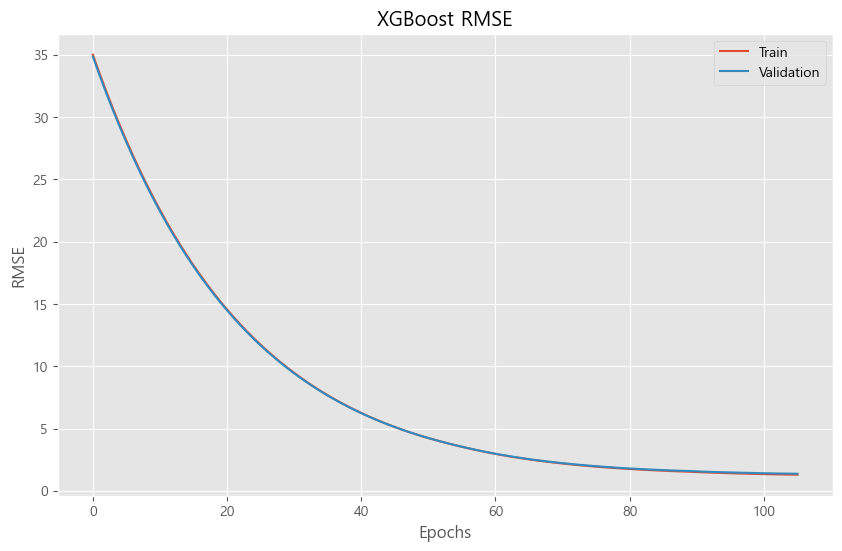

In [45]:
# Get evaluation results
evals_result = xgb_model.evals_result()

# Plot training and validation curves
epochs = len(evals_result['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_axis, evals_result['validation_0']['rmse'], label='Train')
ax.plot(x_axis, evals_result['validation_1']['rmse'], label='Validation')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

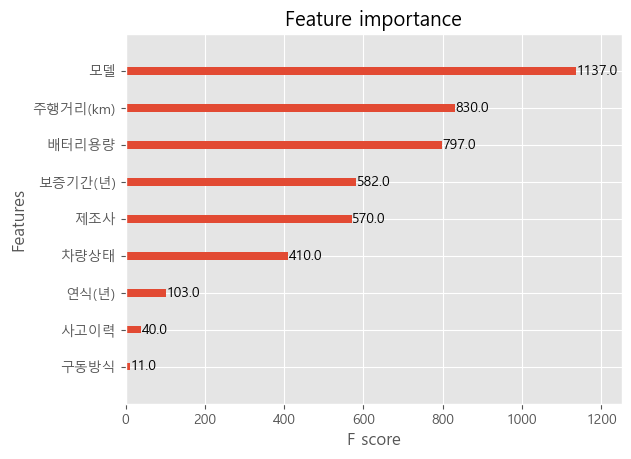

In [46]:
import xgboost
xgboost.plot_importance(xgb_model)

### Light-GBM
- 아무 전처리X : 1.357(실제로는 XGB보다 낮음)

In [263]:
from optuna import Trial,visualization
from optuna.samplers import TPESampler
import optuna

from lightgbm import LGBMRegressor
from sklearn.metrics import root_mean_squared_error

def objectivelgb(trial:Trial,X,y):
    global lgb_param
    lgb_param ={'random_state':2025}

    lgb_model = LGBMRegressor(**param,force_col_wise=True)
    lgb_model.fit(X,y)

    pred = lgb_model.predict(X)
    score = root_mean_squared_error(y,pred)

    return score

In [341]:
study = optuna.create_study(direction='minimize',sampler=TPESampler(seed=2025))

study.optimize(lambda trial: objectivelgb(trial,df_c.drop(columns=['가격(백만원)']),df_c['가격(백만원)']),n_trials=10)
print('Best trial: score: {}, \nparmas: {}'.format(study.best_trial.value,study.best_trial.params))

[I 2025-01-12 15:33:13,585] A new study created in memory with name: no-name-4d4a7f6f-1f64-404d-92f3-d741c72bcad3


[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949


[I 2025-01-12 15:33:14,415] Trial 0 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.


[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949


[I 2025-01-12 15:33:14,630] Trial 1 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.


[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949


[I 2025-01-12 15:33:14,867] Trial 2 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.


[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949


[I 2025-01-12 15:33:15,083] Trial 3 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.


[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949


[I 2025-01-12 15:33:15,413] Trial 4 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.


[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949


[I 2025-01-12 15:33:15,626] Trial 5 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.
[I 2025-01-12 15:33:15,827] Trial 6 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.


[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949


[I 2025-01-12 15:33:16,029] Trial 7 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.


[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949


[I 2025-01-12 15:33:16,266] Trial 8 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.


[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949


[I 2025-01-12 15:33:16,552] Trial 9 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.


Best trial: score: 1.1396787273940583, 
parmas: {}


In [264]:
import numpy as np
from sklearn.model_selection import KFold
folds = KFold(n_splits=5,shuffle=True,random_state=2025)

val_scores_lgb = []
test_pred_lgb = np.zeros(len(test))

for idx,(train_idx,val_idx) in enumerate(folds.split(X,y)):
    print(f'Fold: {idx+1} / Fold: {folds.n_splits}')
    X_train,y_train = X.iloc[train_idx],y.iloc[train_idx]
    X_val,y_val = X.iloc[val_idx],y.iloc[val_idx]

    lgb = LGBMRegressor(**study.best_params,force_col_wise=True)
    lgb_model = lgb.fit(X_train,y_train)

    train_y_pred = lgb_model.predict(X_train)
    val_y_pred = lgb_model.predict(X_val)

    print(f'Train RMSE: {root_mean_squared_error(y_train,train_y_pred)}')
    print(f'Val RMSE: {root_mean_squared_error(y_val,val_y_pred)}')
    print('-' * 30)

    test_pred_lgb += lgb_model.predict(X_test) / folds.n_splits
    val_scores_lgb.append(root_mean_squared_error(val_y_pred,y_val))

print(f'Average RMSE: {np.array(val_scores_lgb).mean()}')

Fold: 1 / Fold: 5
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 8
[LightGBM] [Info] Start training from score 62.548199
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

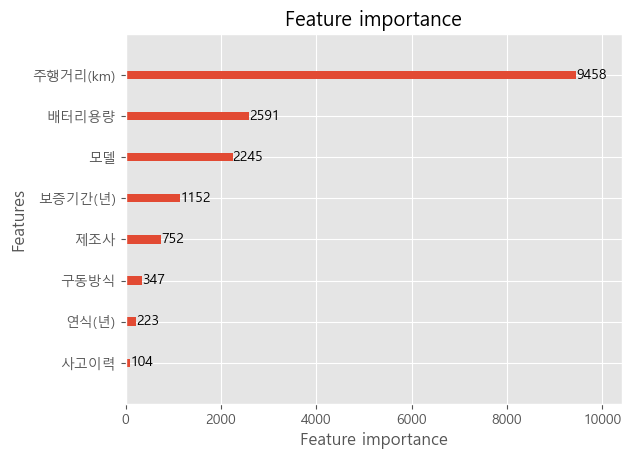

In [265]:
from lightgbm import plot_importance
plot_importance(lgb_model)

### Ensemble (lightgbm & xgboost)

In [344]:
test_ensemble_pred = test_pred_lgb * 0.5 + test_prediction * 0.5

## 결과물 제출

In [47]:
submit.loc[submit['ID'].isin(test_ID),'가격(백만원)'] = test_prediction
submit.to_csv('xgb_distance5000_param6.csv',index=False)

C:\Users\hanan\AppData\Local\Temp\ipykernel_14104\3113523522.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[128.91254425  79.91309643  64.31908417  35.13504505  47.8498373
 100.20194626  22.66483736  39.98020172  81.19734383  25.01651907
  65.45402145  62.85521698  40.4311533   99.88033104  90.2385788
  23.30971766 125.73493576  52.57217598  60.15723133  35.09353256
  37.8676877  159.30015945  47.44241524  55.83646297  23.56513214
  47.8498373   79.41394138  79.91309643  27.96771097 125.65497589
  65.45402145  41.04581356 114.43543625  87.77700996  36.01563597
  79.91427612  22.58643055  40.21912384  25.0090003  120.47333145
 125.75522995  19.1482954  119.47160721  61.06479168  23.56513214
  99.88216019  22.58643055  73.80670166  62.84167194  76.06939507
  36.12922144  17.20641017  38.71336031 126.04444313  23.98214102
  27.97719336 155.27934265  41.04352188 159.16411781  40.42739677
  55.83995819

In [48]:
submit.head()

,ID,가격(백만원)
0,TEST_000,128.912544
1,TEST_001,79.913096
2,TEST_002,64.319084
3,TEST_003,35.135045
4,TEST_004,47.849837
